In [78]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

Generate data

In [79]:
SEED = 1234
NUM_SAMPLES = 50

In [80]:
# Set seed for reproducibility
np.random.seed(seed=SEED)

In [81]:
# Generate syntetic data
def generate_data(num_samples):
    """Generate dummy data for linear regression."""
    X = np.array(range(num_samples))
    random_noise = np.random.uniform(-10, 20, size=num_samples)
    y = 3.5*X + random_noise # add some noise
    return X, y

In [82]:
# Generate random (linear) data
X, y = generate_data(num_samples=NUM_SAMPLES)
data = np.vstack([X, y]).T
print (data[:5])

[[ 0.         -4.25441649]
 [ 1.         12.16326313]
 [ 2.         10.13183217]
 [ 3.         24.06075751]
 [ 4.         27.39927424]]


In [83]:
# Load into a pandas DataFrame
df = pd.DataFrame(data=data, columns=["x", "y"])
X = df[['x']].values
y = df[['y']].values
df.head()

,x,y
0,0.0,-4.254416
1,1.0,12.163263
2,2.0,10.131832
3,3.0,24.060758
4,4.0,27.399274


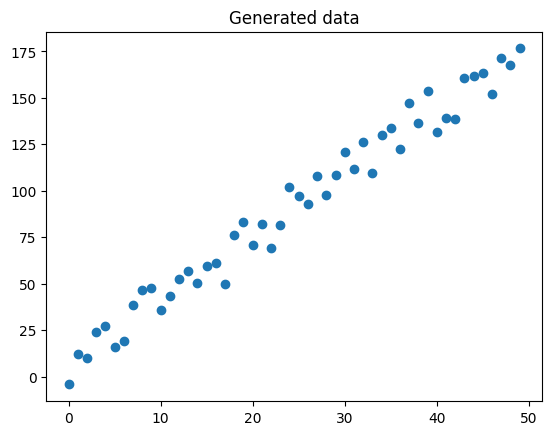

In [84]:
# Scatter plot
plt.title('Generated data')
plt.scatter(x=df['x'], y=df['y'])
plt.show()

### Numpy

Split data

In [85]:
TRAIN_SIZE = 0.7
VAL_SIZE = 0.15
TEST_SIZE = 0.15

In [86]:
#  shuffle data
indices = list(range(NUM_SAMPLES))
np.random.shuffle(indices)
X = X[indices]
y = y[indices]

In [87]:
# Split indices
train_start = 0
train_end = int(TRAIN_SIZE*NUM_SAMPLES)
val_start = train_end
val_end = int((TRAIN_SIZE+VAL_SIZE)*NUM_SAMPLES)
test_start = val_end

In [88]:
# split data
X_train = X[train_start:train_end]
y_train = y[train_start:train_end]
X_val = X[val_start:val_end]
y_val = y[val_start:val_end]
X_test = X[test_start:]
y_test = y[test_start:]
print (f"X_train: {X_train.shape}, y_train: {y_train.shape}")
print (f"X_val: {X_val.shape}, y_test: {y_val.shape}")
print (f"X_test: {X_test.shape}, y_test: {y_test.shape}")

X_train: (35, 1), y_train: (35, 1)
X_val: (7, 1), y_test: (7, 1)
X_test: (8, 1), y_test: (8, 1)


Standardize data

In [89]:
def standardize_data(data, mean, std):
    return (data - mean)/std

In [90]:
# Determine means and stds
X_mean = np.mean(X_train)
X_std = np.std(X_train)
y_mean = np.mean(y_train)
y_std = np.std(y_train)

In [91]:
# standardize 
X_train = standardize_data(X_train, X_mean, X_std)
y_train = standardize_data(y_train, y_mean, y_std)
X_val = standardize_data(X_val, X_mean, X_std)
y_val = standardize_data(y_val, y_mean, y_std)
X_test = standardize_data(X_test, X_mean, X_std)
y_test = standardize_data(y_test, y_mean, y_std)

In [92]:
# Check (means should be ~0 and std should be ~1)
print (f"mean: {np.mean(X_test, axis=0)[0]:.1f}, std: {np.std(X_test, axis=0)[0]:.1f}")
print (f"mean: {np.mean(y_test, axis=0)[0]:.1f}, std: {np.std(y_test, axis=0)[0]:.1f}")

mean: -0.6, std: 0.9
mean: -0.6, std: 0.9


Weights

In [93]:
INPUT_DIM = X_train.shape[1] # X is 1-dimentional
OUTPUT_DIM = y_train.shape[1] # y is 1-dimensional

In [94]:
# Initialize random weights
W = 0.01 * np.random.randn(INPUT_DIM, OUTPUT_DIM)
b = np.zeros((1, 1))
print (f"W: {W.shape}")
print (f"b: {b.shape}")

W: (1, 1)
b: (1, 1)


Model

In [95]:
# Forward pass [NX1] · [1X1] = [NX1]
y_pred = np.dot(X_train, W) + b
print(f"y_pred: {y_pred.shape}")

y_pred: (35, 1)


loss

In [96]:
# loss
N = len(y_train)
loss = (1/N) * np.sum((y_train - y_pred)**2)
print(f"Loss: {loss:.2f}")

Loss: 0.99


Gradient

In [97]:
# Backpropagration
dW = -(2/N) * np.sum((y_train - y_pred) * X_train)
db = -(2/N) * np.sum((y_train - y_pred) * 1)

Update weights

In [98]:
LEARNING_RATE = 1e-1

In [99]:
# update weights
W += -LEARNING_RATE * dW
b += -LEARNING_RATE * db

Training

In [100]:
NUM_EPOCHS = 100

In [101]:
# Initialize random weights
W = 0.01 * np.random.randn(INPUT_DIM, OUTPUT_DIM)
b = np.zeros((1, ))

# Training loop
for epoch_num in range(NUM_EPOCHS):

    # Forward pass [NX1] . [1x1] = [NX1]
    y_pred = np.dot(X_train, W) + b

    # Loss
    loss =(1/len(y_train) * np.sum((y_train - y_pred)**2))
    
    # show progress
    if epoch_num%10==0:
        print (f"Epoch: {epoch_num}, loss: {loss:.3f}")

    # backpropagation
    dW = -(2/N) * np.sum((y_train - y_pred) * X_train)
    db = -(2/N) * np.sum((y_train - y_pred) * 1)

    # Update weights
    W += -LEARNING_RATE * dW
    b += -LEARNING_RATE * b

Epoch: 0, loss: 0.990
Epoch: 10, loss: 0.039
Epoch: 20, loss: 0.028
Epoch: 30, loss: 0.028
Epoch: 40, loss: 0.028
Epoch: 50, loss: 0.028
Epoch: 60, loss: 0.028
Epoch: 70, loss: 0.028
Epoch: 80, loss: 0.028
Epoch: 90, loss: 0.028


Evaluation

In [102]:
# prediction
pred_train = W*X_train + b
pred_test = W*X_test + b

In [103]:
# Train and test MSE
train_mse = np.mean((y_train - pred_train) ** 2)
test_mse = np.mean((y_test - pred_test) ** 2)

print (f"train_MSE: {train_mse:.2f}, test_MSE: {test_mse:.2f}")

train_MSE: 0.03, test_MSE: 0.01


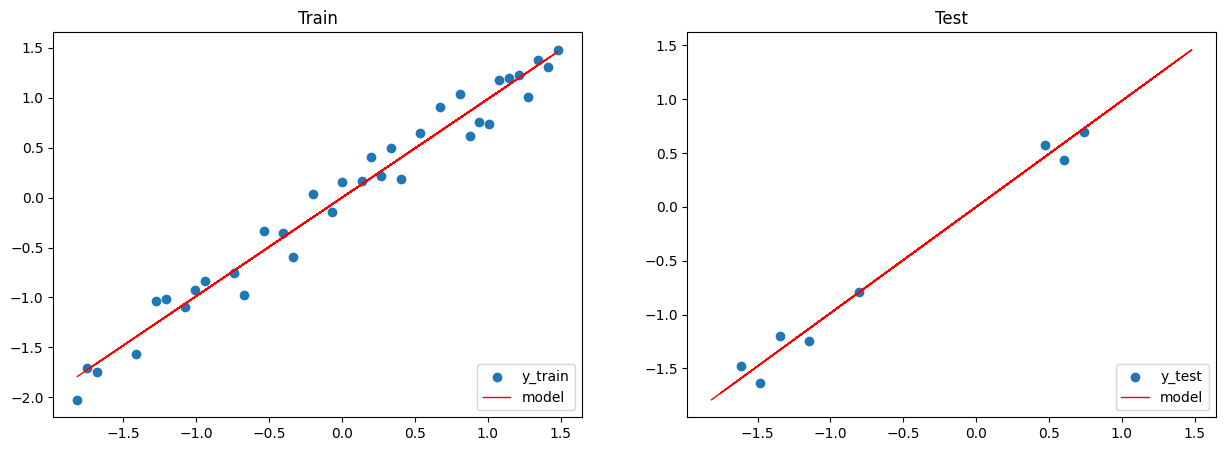

In [104]:
# figure size
plt.figure(figsize=(15, 5))

# plot train data
plt.subplot(1, 2, 1)
plt.title('Train')
plt.scatter(X_train, y_train, label='y_train')
plt.plot(X_train, pred_train, color='red', linewidth=1, linestyle='-', label='model')
plt.legend(loc='lower right')

# plot test data
plt.subplot(1, 2, 2)
plt.title('Test')
plt.scatter(X_test, y_test, label='y_test')
plt.plot(X_train, pred_train, color='red', linewidth=1, linestyle='-', label='model')
plt.legend(loc='lower right')

plt.show()

Intepretation

In [105]:
# Unscaled weights
w_unscaled = W * (y_std/X_std)
b_unscaled = b * y_std + y_mean - np.sum((w_unscaled*X_mean))

print ('[Actual] y = 3.5X + noise')
print (f'[model] y_hat = {w_unscaled[0][0]:.1f}x + {b_unscaled[0]:.1f}')

[Actual] y = 3.5X + noise
[model] y_hat = 3.4x + 7.8


### Pytorch

split data

In [106]:
from sklearn.model_selection import train_test_split

In [108]:
TRAIN_SIZE = 0.7
VAL_SIZE = 0.15
TEST_SIZE = 0.15

In [112]:
# split (train)
X_train, X_, y_train, y_ = train_test_split(X, y, train_size=TRAIN_SIZE)

In [115]:
print (f"train: {len(X_train)} ({len(X_train) / len(X)})\n"
       f"remaining: {len(X_)} ({len(X_) / len(X)})")

train: 35 (0.7)
remaining: 15 (0.3)


In [116]:
# split test
X_val, X_test, y_val, y_test = train_test_split(
    X_, y_, train_size=0.5
)

In [118]:
print (
    f"train: {len(X_train)} ({len(X_train) / len(X)})\n"
    f"val: {len(X_val)} ({len(X_val) / len(X)})\n"
    f"test: {len(X_test)} ({len(X_test) / len(X)})\n"
    )

train: 35 (0.7)
val: 7 (0.14)
test: 8 (0.16)



Standardize data

In [119]:
from sklearn.preprocessing import StandardScaler

In [120]:
# standardize the data (mean=0, std=1) using training data
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

In [134]:
# Apply scaller on training and test data
X_train = X_scaler.transform(X_train)
y_train = y_scaler.transform(y_train).ravel().reshape(-1, 1)
X_val = X_scaler.transform(X_val)
y_val = y_scaler.transform(y_val).ravel().reshape(-1, 1)
X_test = X_scaler.transform(X_test)
y_test = y_scaler.transform(y_test).ravel().reshape(-1, 1)

In [140]:
# check (means should be ~0 and std should ~1)
print (f"mean: {np.mean(X_test, axis=0)[0]:.1f} std: {np.std(X_test, axis=0)[0]:.1f}")
print (f"mean: {np.mean(y_test, axis=0)[0]:.1f}, std: {np.std(y_test, axis=0)[0]:.1f}")

mean: -1.8 std: 0.1
mean: -1.9, std: 0.0


Weights

In [ ]:
from torch import nn